In [1]:
import json
import requests

## Step 1 Data Acquisition
a. Connect two wikimedia apis start from 2007/12 to 2021/09
b. Legacy view data comes from old api start from 2007/12 to 2016/07
c. Page view api comes from the new api start from 2015/01 to 2021/09
d. Call these two api, get the data and save to json file

In [2]:
endpoint_pagecount = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'
endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

In [3]:
# Parameters for getting aggregated legacy view data(Page count all views) 
# see: https://wikimedia.org/api/rest_v1/#!/Legacy_data/get_metrics_legacy_pagecounts_aggregate_project_access_site_granularity_start_end

# Parameters for getting aggregated legacy view data(Page count desktop views) 
pagecount_desktop_views = {"project" : "en.wikipedia.org",
                 "access-site" : "desktop-site",
                 "granularity" : "monthly",
                 "start" : "2007120100",
                # for end use 1st day of month following final month of data
                 "end" : "2016073100"
                    }

# Parameters for getting aggregated legacy view data(Page count desktop views) 
pagecount_mobile_views = {"project" : "en.wikipedia.org",
                 "access-site" : "mobile-site",
                 "granularity" : "monthly",
                 "start" : "2007120100",
                # for end use 1st day of month following final month of data
                 "end" : "2016073100"
                    }

# Parameters for getting aggregated current standard pageview data(Desktop)
# see: https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end
pageview_desktop_views = {"project" : "en.wikipedia.org",
                    "access" : "desktop",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015010100",
                    # for end use 1st day of month following final month of data
                    "end" : '2021093000'
                        }

# Parameters for getting aggregated current standard pageview data(Mobile web)
pageview_mobile_web_views = {"project" : "en.wikipedia.org",
                    "access" : "mobile-web",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015010100",
                    # for end use 1st day of month following final month of data
                    "end" : '2021093000'
                        }

# Parameters for getting aggregated current standard pageview data(Mobile app)
pageview_mobile_app_views = {"project" : "en.wikipedia.org",
                    "access" : "mobile-app",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015010100",
                    # for end use 1st day of month following final month of data
                    "end" : '2021093000'
                        }

# Customize these with your own information
headers = {
    'User-Agent': 'https://github.com/lanfuli',
    'From': 'lanfuli@uw.edu'
}

In [4]:
# call the api function
def api_call(endpoint,parameters):
    call = requests.get(endpoint.format(**parameters), headers=headers)
    response = call.json()
    
    return response

In [5]:
# use the api function to get the json data
pagecounts_desktop_site = api_call(endpoint_pagecount, pagecount_desktop_views)
pagecounts_mobile_site = api_call(endpoint_pagecount, pagecount_mobile_views)
pageviews_desktop = api_call(endpoint_pageviews, pageview_desktop_views)
pageviews_mobile_web = api_call(endpoint_pageviews, pageview_mobile_web_views)
pageviews_mobile_app = api_call(endpoint_pageviews, pageview_mobile_app_views)

In [6]:
def create_json(filename, date):
    # 1. Read file contents
    container = []
    with open(filename, "r") as file:
        container = json.load(file)
        container.update(date)
    # 2. Write json file
    with open(filename, "w") as file:
        json.dump(container, file)    

In [7]:
#Save the json into 5 files
filename = ['pagecounts_desktop_site_200712_201607.json', 'pagecounts_mobile_site_200712_201607.json',
            'pageviews_desktop_201501_202109.json','pageviews_mobile_web_201501_202109.json',
            'pageviews_mobile_app_201501_202109.json']
data_file = [pagecounts_desktop_site, pagecounts_mobile_site, pageviews_desktop, pageviews_mobile_web,
            pageviews_mobile_app]
for file, data in zip(filename, data_file):
    create_json(file, data)

## Step 2: Data Processing
a. convert all json to list type 
b. create dataframe for each json
c. combine all of them into one dataframe
d. export into a csv file

In [8]:
import csv
import pandas as pd
import numpy as np
from collections import Counter

In [9]:
csv_column = ['timestamp', 'access','access-site','Country','views']

In [10]:
csv_file = "en-wikipedia_traffic_200712-202108.csv"

In [11]:
def data_clean(raw_data):
    temp_dict = []
    for i in raw_data.values():
        for j in i:
            temp_dict.append(j)
    return temp_dict

In [12]:
# Remove the items from dict and covert to list
clean_pagecounts_desktop_site = data_clean(pagecounts_desktop_site)
clean_pagecounts_mobile_site = data_clean(pagecounts_mobile_site)
clean_pageviews_desktop = data_clean(pageviews_desktop)
clean_pageviews_mobile_web = data_clean(pageviews_mobile_web)
clean_pageviews_mobile_app = data_clean(pageviews_mobile_app)

In [13]:
# combine pageviews mobile web and mopageviews moile app
clean_pageviews_mobile_all = clean_pageviews_mobile_web + clean_pageviews_mobile_app

In [14]:
def sum_data(data):
    df = pd.DataFrame(data)
    new_df = df.groupby(['timestamp'],dropna=False).sum()
    return new_df

In [15]:
def data_format(data_file):
    df = pd.DataFrame(data_file)
    df['Year'] = df['timestamp'].str[0:4]
    df['Month'] = df['timestamp'].str[4:6]
    return df

In [16]:
pageviews_mobile_all = sum_data(clean_pageviews_mobile_all)
pageviews_mobile_all = pageviews_mobile_all.rename(columns={"views" : "pageview_mobile_views"})
pageviews_mobile_all

,pageview_mobile_views
timestamp,
2015070100,3288755294
2015080100,3302333038
2015090100,3170203333
2015100100,3268499132
2015110100,3236601070
...,...
2021050100,4976579558
2021060100,4584510417
2021070100,4778909421


In [17]:
pageviews_desktop_views = sum_data(clean_pageviews_desktop)
pageviews_desktop_views = pageviews_desktop_views.rename(columns={"views" : "pageviews_desktop_views"})
pageviews_desktop_views

,pageviews_desktop_views
timestamp,
2015070100,4376666686
2015080100,4332482183
2015090100,4485491704
2015100100,4477532755
2015110100,4287720220
...,...
2021050100,2824416177
2021060100,2505971366
2021070100,2765584368


In [18]:
pageview_all_views = pd.DataFrame()
pageview_all_views['pageview_all_views'] = pageviews_desktop_views['pageviews_desktop_views'] + pageviews_mobile_all['pageview_mobile_views']
pageview_all_views

,pageview_all_views
timestamp,
2015070100,7665421980
2015080100,7634815221
2015090100,7655695037
2015100100,7746031887
2015110100,7524321290
...,...
2021050100,7800995735
2021060100,7090481783
2021070100,7544493789


In [19]:
pagecount_mobile_views = sum_data(clean_pagecounts_mobile_site)
pagecount_mobile_views = pagecount_mobile_views.rename(columns={"count" : "pagecount_mobile_views"})

In [20]:
pagecount_desktop_views = sum_data(clean_pagecounts_desktop_site)
pagecount_desktop_views = pagecount_desktop_views.rename(columns={"count" : "pagecount_desktop_views"})

In [21]:
pagecount_all_views = pd.DataFrame()
pagecount_all_views['pagecount_all_views'] = pagecount_desktop_views['pagecount_desktop_views']
pagecount_all_views['pagecount_all_views']= pagecount_all_views['pagecount_all_views'].add(pagecount_mobile_views['pagecount_mobile_views'], fill_value=0)
pagecount_all_views


,pagecount_all_views
timestamp,
2007120100,2.998332e+09
2008010100,4.930903e+09
2008020100,4.818394e+09
2008030100,4.955406e+09
2008040100,5.159162e+09
...,...
2016030100,8.827530e+09
2016040100,8.873621e+09
2016050100,8.748968e+09


In [22]:
# combine all data into one dataframe
frames = [pagecount_all_views, pagecount_desktop_views, pagecount_mobile_views, pageview_all_views, pageviews_desktop_views, pageviews_mobile_all]
res = pd.concat(frames, axis=1)
res = res.fillna(0).astype('int64')
res

,pagecount_all_views,pagecount_desktop_views,pagecount_mobile_views,pageview_all_views,pageviews_desktop_views,pageview_mobile_views
timestamp,,,,,,
2007120100,2998331524,2998331524,0,0,0,0
2008010100,4930902570,4930902570,0,0,0,0
2008020100,4818393763,4818393763,0,0,0,0
2008030100,4955405809,4955405809,0,0,0,0
2008040100,5159162183,5159162183,0,0,0,0
...,...,...,...,...,...,...
2021050100,0,0,0,7800995735,2824416177,4976579558
2021060100,0,0,0,7090481783,2505971366,4584510417
2021070100,0,0,0,7544493789,2765584368,4778909421


In [23]:
# add year and month
res.insert(loc=0, column='Year', value=res.index.astype(str).str[:4])
res.insert(loc=1, column='Month', value=res.index.astype(str).str[4:6])
res

,Year,Month,pagecount_all_views,pagecount_desktop_views,pagecount_mobile_views,pageview_all_views,pageviews_desktop_views,pageview_mobile_views
timestamp,,,,,,,,
2007120100,2007,12,2998331524,2998331524,0,0,0,0
2008010100,2008,01,4930902570,4930902570,0,0,0,0
2008020100,2008,02,4818393763,4818393763,0,0,0,0
2008030100,2008,03,4955405809,4955405809,0,0,0,0
2008040100,2008,04,5159162183,5159162183,0,0,0,0
...,...,...,...,...,...,...,...,...
2021050100,2021,05,0,0,0,7800995735,2824416177,4976579558
2021060100,2021,06,0,0,0,7090481783,2505971366,4584510417
2021070100,2021,07,0,0,0,7544493789,2765584368,4778909421


In [26]:
# save to csv file
res.to_csv('en-wikipedia_traffic_200712-202108.csv', index=False)
df = res

## Step 3: Graph and analysis

a. there are one year overlap from 2015/07 to 2016/07 between api
b. choose pageview_all_views(new api data) for this period time due to the agent can choose user
c. choose the pagecount_all_views data from  2007/12 to 2015/05, pageview_all_views from 2015/07 to 2021/09
d. create two dataframes(pagecount and pageview), then combine them together then plot

In [27]:
df = df.drop(['Year', 'Month'],axis=1)
df

,pagecount_all_views,pagecount_desktop_views,pagecount_mobile_views,pageview_all_views,pageviews_desktop_views,pageview_mobile_views
timestamp,,,,,,
2007120100,2998331524,2998331524,0,0,0,0
2008010100,4930902570,4930902570,0,0,0,0
2008020100,4818393763,4818393763,0,0,0,0
2008030100,4955405809,4955405809,0,0,0,0
2008040100,5159162183,5159162183,0,0,0,0
...,...,...,...,...,...,...
2021050100,0,0,0,7800995735,2824416177,4976579558
2021060100,0,0,0,7090481783,2505971366,4584510417
2021070100,0,0,0,7544493789,2765584368,4778909421


In [28]:
df_count = df[['pagecount_all_views', 'pagecount_desktop_views', 'pagecount_mobile_views']]
df_count = df_count.loc[df['pagecount_all_views'] > 0]
df_count = df_count.rename(columns = {'pagecount_all_views':'all_traffic', 'pagecount_desktop_views':'desktop_traffic',
                'pagecount_mobile_views':'mobile_traffic'}).fillna(0).astype('int64')
df_view = df[['pageview_all_views', 'pageviews_desktop_views', 'pageview_mobile_views']]
df_view = df_view.loc[df['pageview_all_views'] > 0]
df_view = df_view.rename(columns = {'pageview_all_views':'all_traffic', 'pageviews_desktop_views':'desktop_traffic',
                'pageview_mobile_views':'mobile_traffic'}).fillna(0).astype('int64')

In [29]:
frames = [df_count[:91], df_view]
df = pd.concat(frames)
df.insert(loc=0, column='Time', value=df.index.astype(str).str[:4] + '/' + df.index.astype(str).str[4:6])
df = df.reset_index(drop=True)
df = df.set_index('Time')
df

,all_traffic,desktop_traffic,mobile_traffic
Time,,,
2007/12,2998331524,2998331524,0
2008/01,4930902570,4930902570,0
2008/02,4818393763,4818393763,0
2008/03,4955405809,4955405809,0
2008/04,5159162183,5159162183,0
...,...,...,...
2021/05,7800995735,2824416177,4976579558
2021/06,7090481783,2505971366,4584510417
2021/07,7544493789,2765584368,4778909421


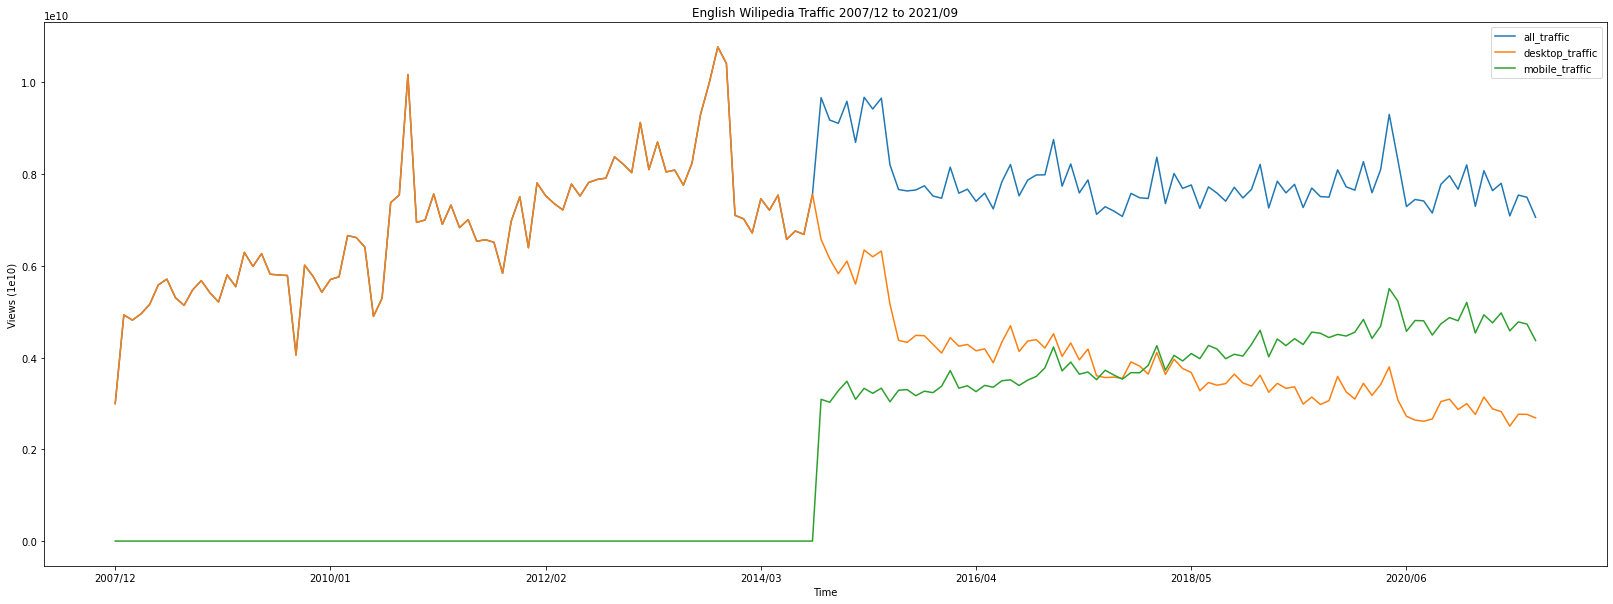

In [30]:
import matplotlib.pyplot as plt
df_plot = df.plot.line(figsize=(28,10),
        xlabel = 'Time',
        ylabel = 'Views (1e10)',
        title = 'English Wilipedia Traffic 2007/12 to 2021/09'
       )
df_plot

In [31]:
df_plot.get_figure().savefig('English Wilipedia Traffic.png', format='png')